In [6]:
pip install pandas numpy matplotlib scikit-learn yfinance


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import yfinance as yf
import seaborn as sns


In [8]:
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Display the first few rows of the data
stock_data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167595,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200


In [9]:
# Create moving averages as new features
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

# Calculate daily return
stock_data['Return'] = stock_data['Close'].pct_change()

# Drop missing values
stock_data.dropna(inplace=True)

# Display updated data
stock_data.head()


,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Return
Date,,,,,,,,,
2020-10-15,118.720001,121.199997,118.150002,120.709999,117.963226,112559200,116.922999,88.593500,-0.003961
2020-10-16,121.279999,121.550003,118.809998,119.019997,116.311684,115393800,117.025349,88.813162,-0.014001
2020-10-19,119.959999,120.419998,115.660004,115.980003,113.340858,120639300,117.122699,89.021275,-0.025542
2020-10-20,116.199997,118.980003,115.629997,117.510002,114.836044,124423700,117.218349,89.234075,0.013192
2020-10-21,116.669998,118.709999,116.449997,116.870003,114.210609,89946000,117.368250,89.445437,-0.005446


In [11]:
# Define a binary target for stock price downfalls
# 1 if the stock price fell by more than 1%, 0 otherwise
stock_data['Target'] = np.where(stock_data['Return'] < -0.01, 1, 0)

# Display data with the new Target column
stock_data[['Return', 'Target']].head()


,Return,Target
Date,,
2020-10-15,-0.003961,0
2020-10-16,-0.014001,1
2020-10-19,-0.025542,1
2020-10-20,0.013192,0
2020-10-21,-0.005446,0


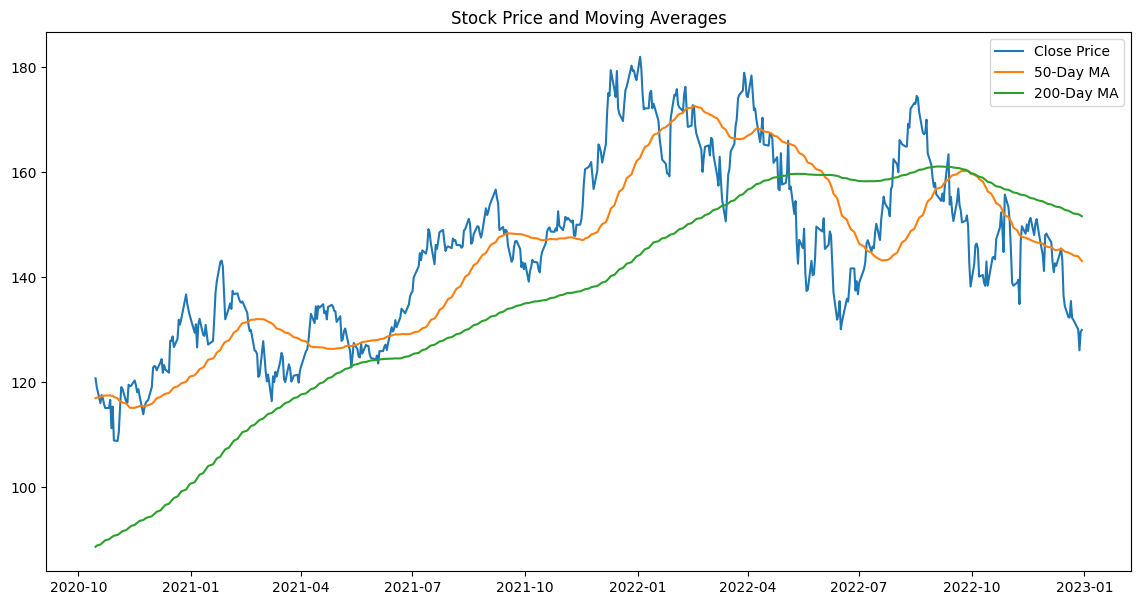

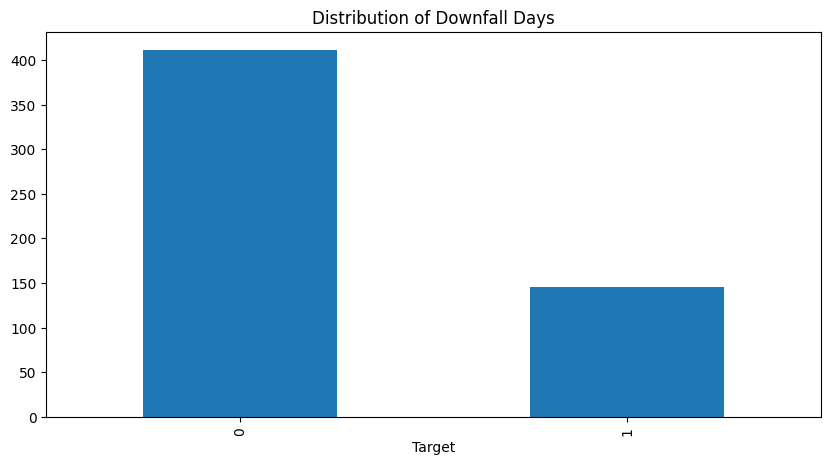

In [12]:
# Plot the stock price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA50'], label='50-Day MA')
plt.plot(stock_data['MA200'], label='200-Day MA')
plt.title('Stock Price and Moving Averages')
plt.legend()
plt.show()

# Plot the target variable
plt.figure(figsize=(10, 5))
stock_data['Target'].value_counts().plot(kind='bar')
plt.title('Distribution of Downfall Days')
plt.show()


In [13]:
# Select features and target
X = stock_data[['MA50', 'MA200', 'Return']]  # You can add more features if necessary
y = stock_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (445, 3)
Testing Set Shape: (112, 3)


In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(cm)


Accuracy: 1.0
Confusion Matrix:
[[81  0]
 [ 0 31]]
